# NaN Boxing Benchmarks

In [5]:
# Librairies
%pip install -q matplotlib numpy pandas scikit-learn
import numpy as np
import re
import subprocess
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip3.11 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [6]:
INTERPRETER = "./target/release/som-interpreter-bc"
LIBS = "core-lib/Smalltalk core-lib/Examples/Benchmarks core-lib/Examples/Benchmarks/LanguageFeatures core-lib/Examples/Benchmarks/TestSuite core-lib/Examples/Benchmarks/ValBenchmark"

def exec_bench(name, runs=2000):
    runtimes = []
    allocations = []

    for i in range(runs):
        cmd = f"{INTERPRETER} -c {LIBS} . -- BenchmarkHarness {name} 1"
        
        result = subprocess.run(cmd, shell=True, capture_output=True, text=True)
        output = result.stdout

        runtime = re.search(r"runtime: (\d+)us", output)
        allocated = re.search(r"Allocated:    (\d+)bytes", output)
        if runtime:
            runtimes.append(int(runtime.group(1)))
        if allocated:
            allocations.append(int(allocated.group(1)))

        else:
            print("Runtime not found in output:")
            print(output)
    
    return (runtimes, allocations)


In [7]:
def plot_results(name, runtimes, allocations):
    import matplotlib.pyplot as plt

    iterations = list(range(1, len(runtimes) + 1))
    avg_runtime = sum(runtimes) / len(runtimes)
    avg_alloc = sum(allocations) / len(allocations)

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True, gridspec_kw={'height_ratios': [2, 1]})

    # Runtime plot (top)
    ax1.plot(iterations, runtimes, marker='o', linestyle='-', color='blue', label='Runtime (μs)')
    ax1.axhline(avg_runtime, color='blue', linestyle='--', label=f'Avg Runtime: {avg_runtime:.1f}μs')
    ax1.set_ylabel('Runtime (μs)')
    ax1.set_title(f'Benchmark: {name}')
    ax1.legend()
    ax1.grid(True)

    # Allocation plot (bottom)
    ax2.bar(iterations, allocations, color='orange', alpha=0.6, label='Allocation (bytes)')
    ax2.axhline(avg_alloc, color='orange', linestyle='--', label=f'Avg Alloc: {avg_alloc:.0f} bytes')
    ax2.set_ylabel('Allocation (bytes)')
    ax2.set_xlabel('Iteration')
    ax2.legend()
    ax2.grid(True)

    plt.tight_layout()
    plt.show()


Benchmark: DoubleSqrtBench, Runs: 100, Runtimes: [1698, 1951, 1640, 1679, 1543, 1503, 1483, 1564, 1490, 1515, 1477, 1466, 1470, 1483, 1596, 1448, 1488, 1491, 1502, 1468, 1488, 1503, 1483, 1583, 1454, 1500, 1492, 1457, 1454, 1486, 1565, 1474, 1490, 1510, 1466, 1459, 1536, 1479, 1455, 1508, 1468, 1443, 1590, 1537, 1448, 1482, 1494, 1558, 1454, 1514, 1583, 1451, 1473, 1487, 1592, 1470, 1498, 1584, 1442, 1491, 1504, 1494, 1449, 1536, 1486, 1454, 1493, 1532, 1450, 1486, 1523, 1464, 1503, 1698, 1538, 1444, 1472, 1502, 1612, 1520, 1504, 1564, 1449, 1496, 1460, 1476, 1506, 1573, 1465, 1460, 1483, 1432, 1567, 1482, 1463, 1497, 1522, 1442, 1470, 1497], Allocations: [1196032, 1196032, 1196032, 1196032, 1196032, 1196032, 1196032, 1196032, 1196032, 1196032, 1196032, 1196032, 1196032, 1196032, 1196032, 1196032, 1196032, 1196032, 1196032, 1196032, 1196032, 1196032, 1196032, 1196032, 1196032, 1196032, 1196032, 1196032, 1196032, 1196032, 1196032, 1196032, 1196032, 1196032, 1196032, 1196032, 1196032, 11

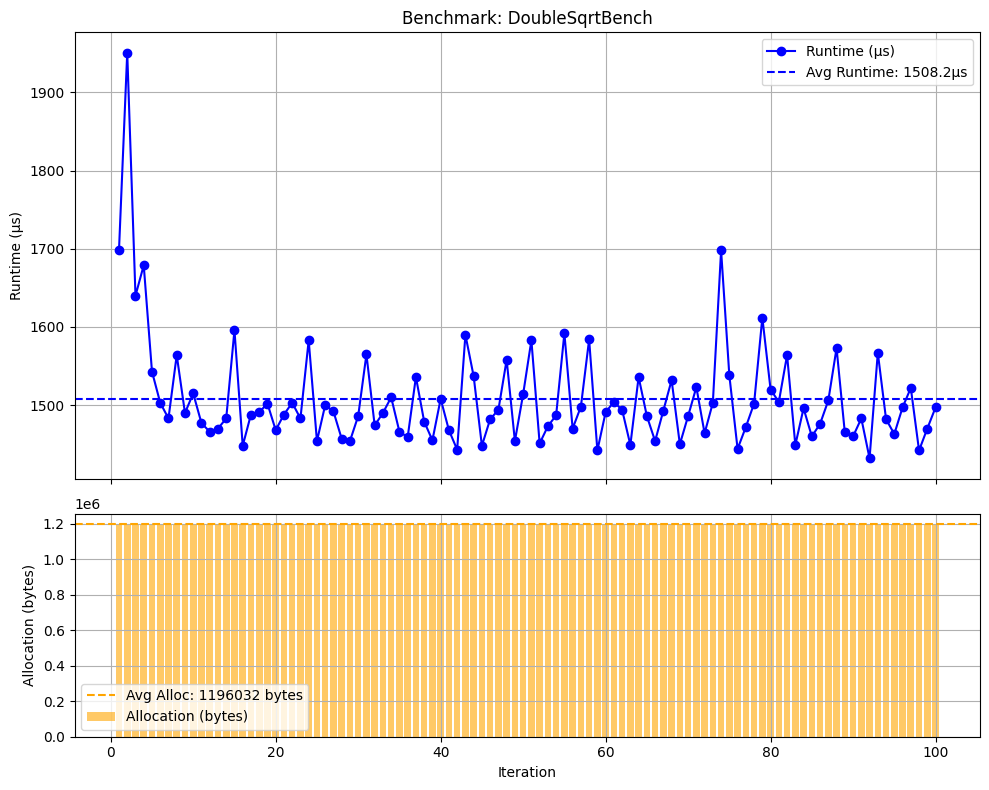

Benchmark: DoubleLExpBench, Runs: 100, Runtimes: [34, 31, 36, 31, 31, 30, 32, 31, 35, 31, 31, 29, 31, 31, 38, 29, 29, 30, 37, 32, 35, 36, 29, 40, 33, 29, 34, 29, 37, 32, 30, 30, 29, 29, 36, 30, 31, 30, 30, 29, 30, 30, 29, 29, 29, 29, 29, 29, 30, 29, 29, 32, 36, 32, 29, 29, 30, 30, 30, 31, 30, 30, 29, 29, 29, 30, 29, 35, 29, 29, 29, 30, 30, 30, 29, 29, 30, 29, 29, 37, 29, 30, 29, 29, 35, 30, 29, 29, 39, 34, 32, 31, 39, 29, 29, 30, 31, 30, 38, 30], Allocations: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


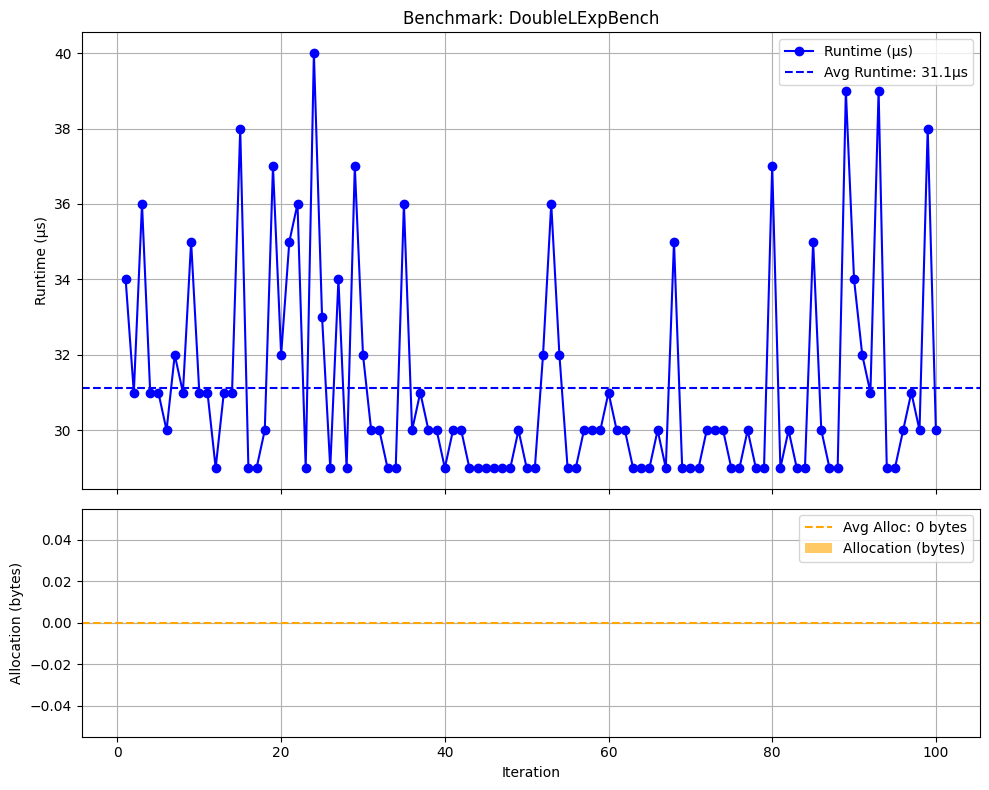

In [ ]:
# General Configuration
BENCHMARKS = [
    "DoubleBench",
    "DoubleMedBench",
    "DoubleHighBench",
    "DoubleSqrtBench",
    "DoubleLExpBench",
    "IntegerBench",
    "IntegerMedBench",
    "IntegerHighBench",
    "IntegerExpBench",
    "IntegerBigBench"
]

runs = 100

for benchmark in BENCHMARKS:
    outcome = exec_bench(benchmark, runs)
    print(f"Benchmark: {benchmark}, Runs: {runs}, Runtimes: {outcome[0]}, Allocations: {outcome[1]}")
    plot_results(benchmark, outcome[0], outcome[1])